# Time Series Forecasting Tutorial

## Introduction

Welcome to this Jupyter Notebook tutorial on time series forecasting. In this tutorial, we will walk through the process of forecasting time series data using the toolkit we created.

## Table of Contents

- **[Import Required Libraries and Tool Kit](#1--import-required-libraries-and-tool-kit)**    
- **[Data Loading and Preprocessing](#2--data-loading-and-preprocessing)**

    - **[Instantiate Data Manager and Load data](#21--instantiate-data-manager-and-load-data)**
    - **[Preprocess Data](#22--preprocess-data)**
    - **[Interpolate Nulls](#23--interpolate-nulls)**
    - **[Data Splitting](#24--data-splitting)**
    - **[Data Standardization](#25--data-standardization)**
    - **[Data Preparation for Forecasting](#26--data-preparation-for-forecasting)**
    
- **[Forecasting Models](#3--forecasting-models)**

    - **[Select Architecture and its Configuration](#31--select-architecture-and-its-configuration)**
        - **[Patch TST](#311--patch-tst)**
        - **[Inception Time Plus](#312--inception-time-plus)**
    - **[Creating a unique run path](#32--creating-a-unique-run-path)**
    - **[Instantiate Learner Manager](#33--instantiate-a-learner-manager-with-selected-architecture-and-configurations)**
    - **[Model Training](#34--model-training)**
    - **[Model Export](#35--model-export)**
    - **[Evaluation of the Model](#36--evaluation-of-the-model)**
        - **[Evaluation on Validation Data](#361--evaluation-on-validation-data)**
        - **[Evaluation on Test Data](#362--evaluation-on-test-data)**
    - **[Model Prediction and Forecast Plot](#37--model-prediction-and-forecast-plot)**


## Code Structure

Throughout this notebook, we'll be using Python and the following libraries:

- [pathlib](https://docs.python.org/3/library/pathlib.html) for working with file paths.
- [uuid](https://docs.python.org/3/library/uuid.html) for generating unique identifiers.
- [tstoolkit](TS Toolkit Documentation) for time series analysis and modeling.

## Let's Get Started!

We'll begin by importing the necessary libraries and tools and proceed step by step through the time series forecasting process.

## 1- Import Required Libraries and Tool Kit

In [1]:
# Import the Path class for working with file system paths
from pathlib import Path

# Import the DataManager class for data preprocessing
from tstoolkit.data_preprocess import DataManager

# Import classes and enumerations related to time series modeling
from tstoolkit.forecasting_models import TsaiLearnerManager, TsaiModels, SplitType

# Import utility functions for calculating error metrics and visualization
from tstoolkit.utils import mse, mae, ShowGraph

# Import the uuid module for generating universally unique identifiers
import uuid

## 2- Data Loading and Preprocessing

In this section, we load and preprocess the time series data.

### 2.1- Instantiate Data Manager and Load Data
- Data Path: The data_path variable contains the file path or URL to the time series data in HDF5 format.
- DataManager: The data_manager object is an instance of a data management class (you should provide more details about this class if necessary) used to handle data loading and preprocessing.
- Load Data: We load the time series data from the specified path.

In [2]:
# Define the path to the time series data file
data_path = Path("../data/example_data.hd5")

# Create an instance of a data manager (DataManager) with the specified data file path
data_manager = DataManager(data_path)

# Load the time series data from the specified data file
data = data_manager.load_data()

### 2.2- Preprocess Data
- The data is preprocessed to reshape the data into a format suitable for the model

In [3]:
# Preprocess the time series data
data = data_manager.preprocess_data(data)

### 2.3- Interpolate Nulls
We fill any nulls in our time series, to prevent errors during training.

- Any missing or NaN values in the data are filled using interpolation techniques and possible methods described in the documentation.

In [4]:
# Fill gaps or missing values in the time series data using linear interpolation
data = data_manager.interpolate_nulls(data, interpolation_method="linear")

# View top 5 rows of the processed data
data.head()

,DateTime,300468,300498,305256,315036,340686,341124,341550
0,2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
1,2020-01-01 00:00:30,59.085239,2036.812866,67.127098,114.341003,1.691197,5.378604,1.403499
2,2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
3,2020-01-01 00:01:30,74.437500,2036.780334,71.723625,114.207180,1.830390,5.459568,1.512679
4,2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


### 2.4- Data Splitting
Now, we split the preprocessed data into training and testing sets.
- Split Data: We split data to create the train/validation/test splits. To change more parameters, read documentation.

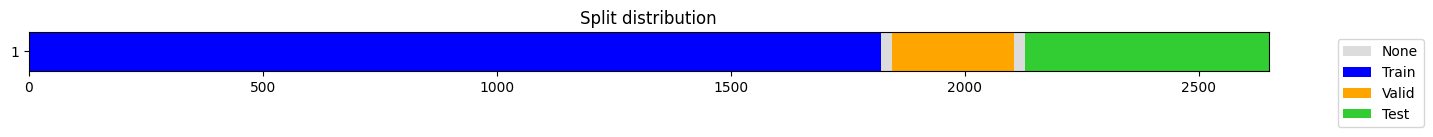

In [5]:
# Split the time series data into training, validation, and test sets
splits = data_manager.split_data(data, show_plot=True)

### 2.5- Data Standardization
Then, we standardize the data to ensure consistent scales for modeling. We also save pipeline for later use in model learner.
- The data is standardized to have a mean of 0 and a standard deviation of 1. The standardize_pipe variable holds the standardization pipeline.

In [6]:
# Standardize the time series data using a specified pipeline
data_standardized, standardize_pipe = data_manager.standardize_data(data, splits, data.columns[1:], verbose=False)

### 2.6- Data Preparation for Forecasting
Finally, we prepare the data for time series forecasting.
- Data Preparation: We create input (x) and target (y) sequences for time series forecasting using the standardized data. To change more parameters, read documentation.

In [7]:
# Extract input (x) and target (y) data for time series forecasting
x, y = data_manager.get_forecasting_data(data_standardized)

## 3- Forecasting Models

### 3.1- Select Architecture and its configuration
To begin, we will select the architectre we want to use and its confguration

#### 3.1.1- Patch TST

The patch-based transformer architecture, initially successful in computer vision tasks, has found adaptation in the realm of time series data analysis. This report explores the application of the patch-based transformer architecture to process sequential time series data, aiming to understand its key components, advantages, and potential applications.

##### Key Components of Patch-Based Transformer Architecture

1. **Patch Segmentation:** Time series data is segmented into fixed-length patches, treating them as sequential tokens for processing.

2. **Tokenization and Positional Encoding:** Each patch in the time series is tokenized and embedded, retaining temporal information using positional encoding.

3. **Transformer Encoder:** The tokenized patches traverse through a transformer encoder, enabling the model to learn temporal dependencies and patterns.

4. **Multi-Head Self-Attention:** Multiple attention heads allow the model to comprehend complex temporal relationships and long-range dependencies within the time series data.

5. **Feedforward Neural Networks:** Following the attention mechanisms, a feedforward neural network extracts features and generates output representations for each patch.

##### Advantages of Patch-Based Transformers in Time Series Analysis

- **Temporal Understanding:** Effective capture of temporal relationships, enabling the model to learn intricate patterns within the time series data.

- **Scalability:** Adaptability to time series of various lengths by segmenting them into fixed-size patches, accommodating diverse temporal resolutions.

- **Transfer Learning:** Pre-trained models on extensive time series datasets can be fine-tuned for specific tasks, enhancing performance across different time series analysis problems.

##### Potential Applications

- **Forecasting:** Utilizing learned temporal patterns to predict future values in time series data.
  
- **Anomaly Detection:** Identifying irregular or anomalous patterns within the time series data.
  
- **Classification:** Categorizing time series data into different classes based on learned features and patterns.


The patch-based transformer architecture demonstrates promising potential in comprehending sequential time series data, offering a robust framework for advanced analysis, prediction, and understanding of complex temporal patterns.




- Patch TST Model Architecture name and configurations

In [8]:
# Specify the architecture for time series forecasting as PATCH-TST
arch_patch_tst = TsaiModels.PATCH_TST.value

# Define configuration parameters for the PATCH-TST architecture
arch_config_patch_tst = dict(
    n_layers=12,          # Number of transformer layers
    n_heads=8,            # Number of attention heads in each layer
    d_model=128,          # Dimension of the model's hidden states
    d_ff=256,             # Dimension of the feed-forward network
    attn_dropout=0.1,     # Dropout rate for attention layers
    dropout=0.1,          # Dropout rate for the model's hidden states
    patch_len=24,         # Length of input patches
    stride=2,             # Stride for patch extraction
    padding_patch=True    # Whether to pad the input to match patch length
)

#### 3.1.2- Inception Time Plus

- Inception Time Plus Model Architecture name and configurations

In [9]:
arch_inception = TsaiModels.INCEPTION_TIME_PLUS.value

arch_config_inception = dict(
    nf=4
)

### 3.2- Creating a Unique Run Path

Now, we create a unique directory path for storing the results of a particular run.


In [10]:
run_path = Path(f"./run/{arch_patch_tst}/{uuid.uuid4()}")
run_path.mkdir(parents=True, exist_ok=True)

### 3.3- Instantiate a Learner Manager with selected architecture and configurations

Then, we initialize a learner manager for time series forecasting.

In [11]:
# Create a TsaiLearnerManager instance to manage the time series forecasting model training
learner_manager = TsaiLearnerManager(
    arch=arch_patch_tst,                # Specify the model architecture as 'arch_patch_tst'
    arch_config=arch_config_patch_tst,  # Define the model architecture configuration
    loss_func=mse,                      # Specify the loss function (Mean Squared Error)
    metrics=[mae, mse],                 # Define evaluation metrics (Mean Absolute Error and Mean Squared Error)
    x=x,                                # Input time series data
    y=y,                                # Target values for forecasting
    splits=splits,                      # Data splits for training and evaluation
    artifacts_path=run_path,            # Path to store artifacts and results
    batch_size=16,                      # Batch size for training
    pipelines=[standardize_pipe],       # Data preprocessing pipelines (e.g., standardization)
    callbacks=[ShowGraph()]             # Callback to show training and validation graphs
)

### 3.4- Model Training

Finally, we train the time series forecasting model using the initialized `learner_manager`.

- Finding Maximum Learning Rate (lr_max): We use the find_max_lr() method to determine the maximum learning rate suitable for training. This helps in selecting an appropriate learning rate for the training process.

- Model Training (fit()): The fit() method is called to train the time series forecasting model. It takes the following parameters:
    - epochs: The number of training epochs, which is set to 50 in this example.
    - lr_max: The maximum learning rate determined in the previous step. The model will adjust its learning rate during training based on this value.

epoch,train_loss,valid_loss,mae,mse,time
0,0.825738,1.591245,0.744004,1.591245,00:09
1,0.720094,1.341218,0.654707,1.341218,00:09
2,0.629842,1.222898,0.612324,1.222898,00:09
3,0.568112,1.173731,0.587784,1.173731,00:09
4,0.521394,1.127396,0.566258,1.127396,00:09
5,0.492634,1.178010,0.573759,1.178010,00:09
6,0.468556,1.178972,0.578275,1.178972,00:09
7,0.448291,1.166021,0.561542,1.166021,00:10
8,0.429435,1.170109,0.559298,1.170109,00:10
9,0.411200,1.186194,0.570133,1.186194,00:10


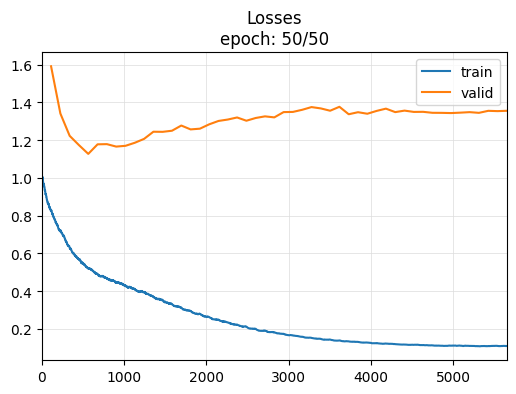

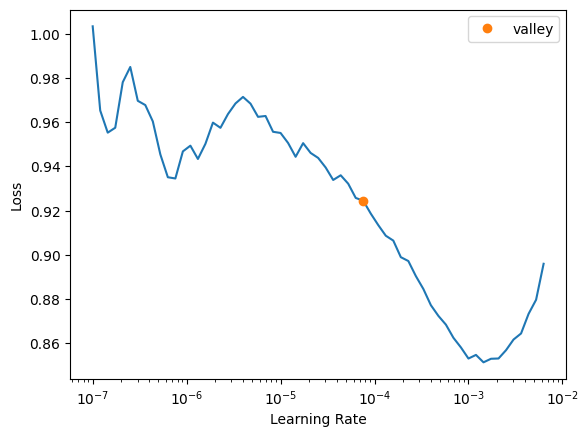

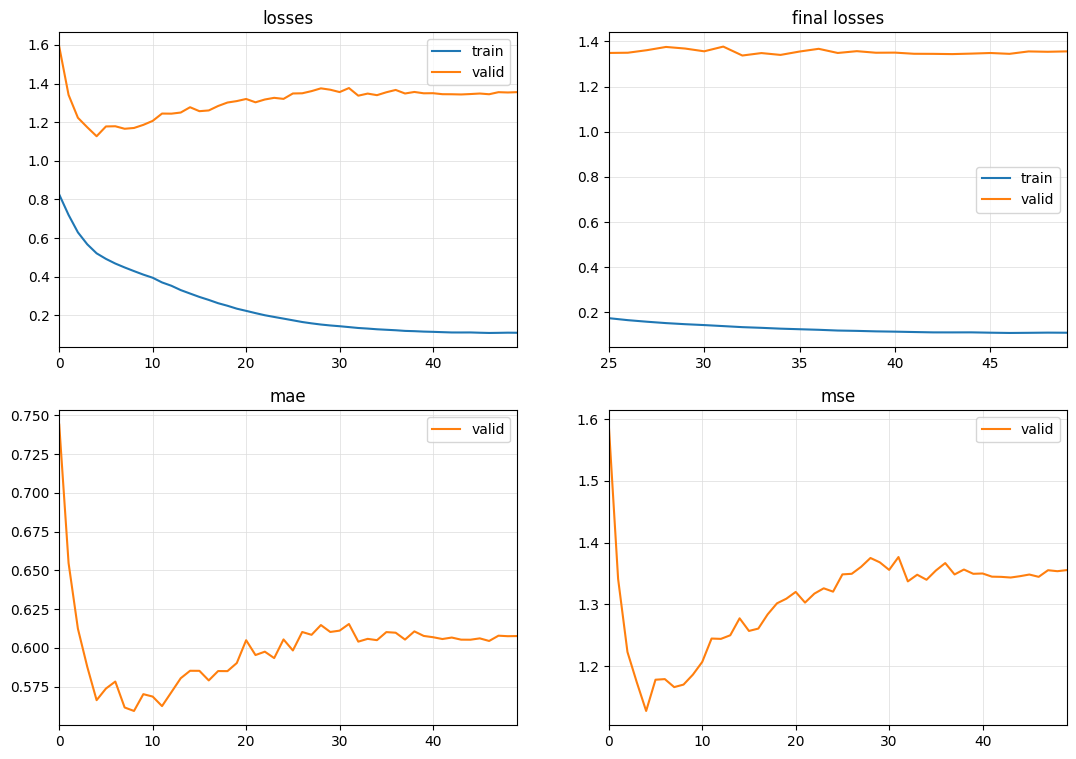

In [12]:
# Find the maximum learning rate for training
lr_max = learner_manager.find_max_lr()

# Train the model for a specified number of epochs
learner_manager.fit(epochs=50, lr_max=lr_max)

### 3.5- Model Export

After training we export the trained time series forecasting model using the `learner_manager`.

- Model Export (export_model()): We use the export_model() method to save the trained model to a file. The artifact_name parameter specifies the name of the exported model file, which includes the architecture (arch) as part of the filename.

In [23]:
# Export the trained model to a file
learner_manager.export_model(artifact_name=f"{arch_patch_tst}.pt")

### 3.6- Evaluation of the Model

We evaluate the trained model on the validation and test data split.

- Model Evaluation (evaluate()): We use the evaluate() method to assess the model's performance on the validation and test data. The split_type parameter is set to SplitType.VALID or SplitType.TEST to indicate different splits.


#### 3.6.1- Evaluation on Validation data

In [14]:
# Specify the validation split
valid_split = splits[1]

# Extract the validation data
x_valid = x[valid_split]
y_valid = y[valid_split]

# Evaluate the model on the validation data
learner_manager.evaluate(x_valid, y_valid, split_type=SplitType.VALID)

,mae,mse
valid,0.607611,1.355538


#### 3.6.2- Evaluation on Test data

In [15]:
# Specify the test split
test_split = splits[2]

# Extract the test data
x_test = x[test_split]
y_test = y[test_split]

# Evaluate the model on the test data
learner_manager.evaluate(x_test, y_test, split_type=SplitType.TEST)

,mae,mse
test,0.766222,2.397099


### 3.7- Model Prediction and Forecast Plot

Moreover, we make predictions using the trained time series forecasting model on the test data and create a forecast plot to visualize the results.

- Model Prediction (predict()): We use the predict() method to generate predictions (y_pred) using the trained time series forecasting model. These predictions are based on the test input data (x_test).

- Forecast Plot (get_forecast_plot()): We create a forecast plot to visualize and compare the actual target values (y_test) with the model's predicted values (y_pred). This plot helps assess how well the model's forecasts align with the true values.

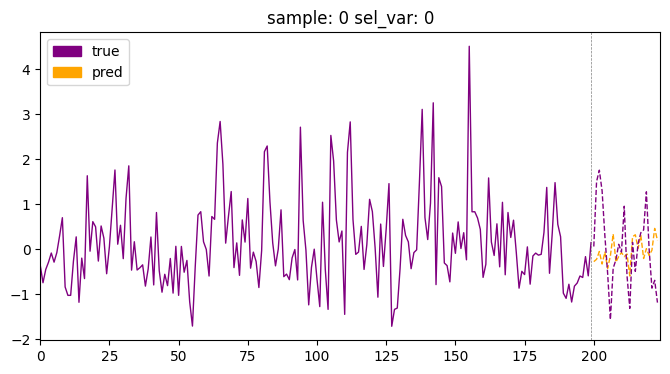

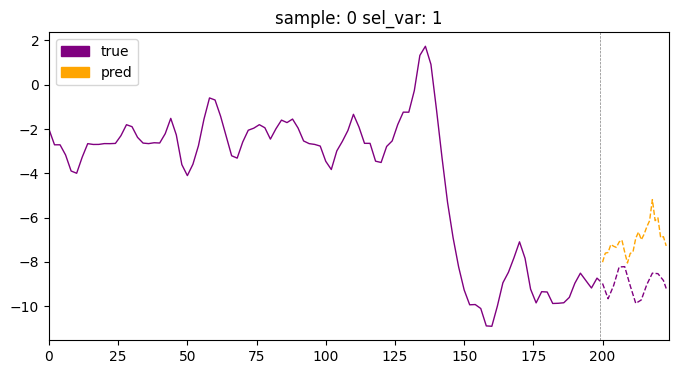

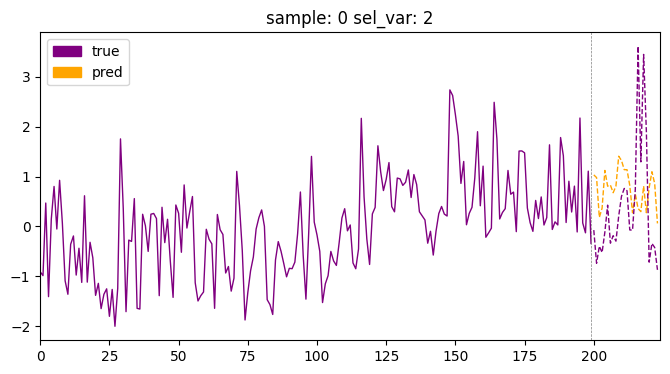

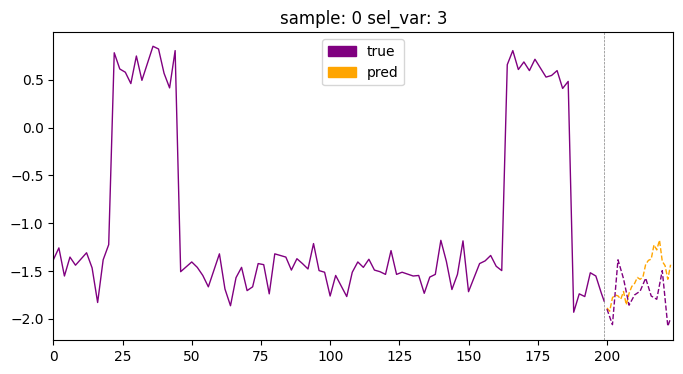

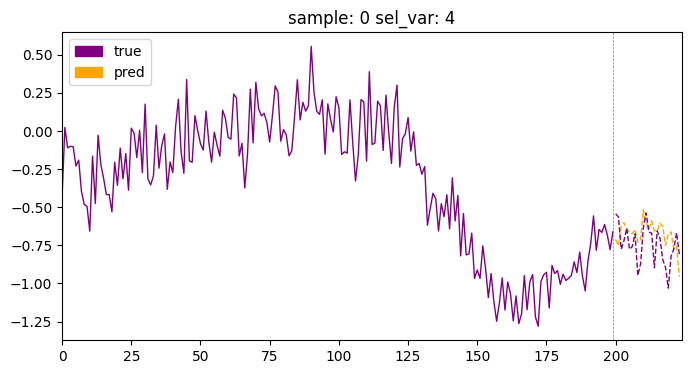

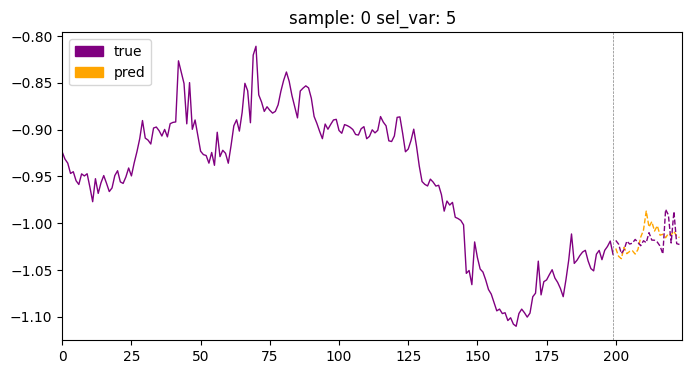

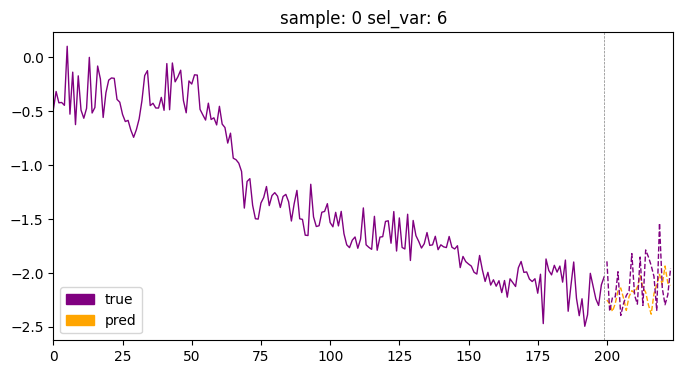

In [16]:
# Generate predictions using the model
y_pred = learner_manager.predict(x_test)

# Create a forecast plot to compare actual vs. predicted values
learner_manager.get_forecast_plot(x_test,y_test,y_pred)